<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# ASSIGNMENT

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.

- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
#import
import numpy as np
import pandas as pd


In [2]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2019-09-05 23:40:48--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip.1’

LoanStats_2018Q4.cs     [                 <=>]  21.58M   891KB/s    in 25s     

2019-09-05 23:41:14 (886 KB/s) - ‘LoanStats_2018Q4.csv.zip.1’ saved [22631049]



In [3]:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
replace LoanStats_2018Q4.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
!head LoanStats_2018Q4.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

In [5]:
!tail LoanStats_2018Q4.csv

"","","5600","5600","5600"," 36 months"," 13.56%","190.21","C","C1","","n/a","RENT","15600","Not Verified","Oct-2018","Current","n","","","credit_card","Credit card refinancing","836xx","ID","15.31","0","Aug-2012","0","","97","9","1","5996","34.5%","11","w","4264.17","4264.17","1891.55","1891.55","1335.83","555.72","0.0","0.0","0.0","Aug-2019","190.21","Sep-2019","Aug-2019","0","","1","Individual","","","","0","0","5996","0","0","0","1","20","0","","0","2","3017","35","17400","1","0","0","3","750","4689","45.5","0","0","20","73","13","13","0","13","","20","","0","3","5","4","4","1","9","10","5","9","0","0","0","0","100","25","1","0","17400","5996","8600","0","","","","","","","","","","","","N","","","","","","","","","","","","","","","N","","","","","",""
"","","23000","23000","23000"," 36 months"," 15.02%","797.53","C","C3","Tax Consultant","10+ years","MORTGAGE","75000","Source Verified","Oct-2018","Charged Off","n","","","debt_consolidation","Debt consolidation","352xx","AL","20.9

In [6]:
#Let's read it in without the extra bits.
df = pd.read_csv('LoanStats_2018Q4.csv', header=1, skipfooter=2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [7]:
#Checking
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10000,10000,10000.0,36 months,10.33%,324.23,B,B1,NaN,< 1 year,MORTGAGE,280000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,974xx,OR,6.15,2,Jan-1996,0,18.0,NaN,14,0,9082,38%,23,w,8289.30,8289.30,2261.00,2261.00,...,28.6,0,0,367828,61364,20900,54912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,4000,4000,4000.0,36 months,23.40%,155.68,E,E1,Security,3 years,RENT,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,070xx,NJ,26.33,0,Sep-2006,4,59.0,NaN,15,0,5199,19.2%,20,w,3423.38,3423.38,1081.96,1081.96,...,0.0,0,0,98655,66926,21900,71555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97%,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Late (31-120 days),n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,NaN,8,0,4599,19.1%,13,w,4456.17,4456.17,895.96,895.96,...,0.0,0,0,136927,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,23000,23000,23000.0,60 months,20.89%,620.81,D,D4,Operator,5 years,RENT,68107.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,672xx,KS,0.52,0,Feb-1997,0,NaN,NaN,5,0,976,13%,10,w,21353.16,21353.16,4307.45,4307.45,...,0.0,0,0,7500,976,3300,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,8000,8000,8000.0,36 months,23.40%,311.35,E,E1,Manager,10+ years,OWN,43000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,357xx,AL,33.24,0,Jan-1995,0,NaN,107.0,8,1,9019,81.3%,16,w,6846.83,6846.83,2163.85,2163.85,...,100.0,1,0,199744,31078,2300,32206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.isnull().sum().sort_values(ascending=False)

id                                            128412
desc                                          128412
member_id                                     128412
url                                           128412
orig_projected_additional_accrued_interest    128386
                                               ...  
inq_last_12m                                       0
acc_open_past_24mths                               0
chargeoff_within_12_mths                           0
delinq_amnt                                        0
inq_fi                                             0
Length: 144, dtype: int64

In [0]:
#Looks good, let's drop the privacy ones.
df = df.drop(columns= ['id','member_id'])

In [10]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,10000,10000,10000.0,36 months,10.33%,324.23,B,B1,NaN,< 1 year,MORTGAGE,280000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,974xx,OR,6.15,2,Jan-1996,0,18.0,NaN,14,0,9082,38%,23,w,8289.30,8289.30,2261.00,2261.00,1710.70,550.30,...,28.6,0,0,367828,61364,20900,54912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,4000,4000,4000.0,36 months,23.40%,155.68,E,E1,Security,3 years,RENT,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,070xx,NJ,26.33,0,Sep-2006,4,59.0,NaN,15,0,5199,19.2%,20,w,3423.38,3423.38,1081.96,1081.96,576.62,505.34,...,0.0,0,0,98655,66926,21900,71555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,5000,5000,5000.0,36 months,17.97%,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Late (31-120 days),n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,NaN,8,0,4599,19.1%,13,w,4456.17,4456.17,895.96,895.96,543.83,352.13,...,0.0,0,0,136927,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,23000,23000,23000.0,60 months,20.89%,620.81,D,D4,Operator,5 years,RENT,68107.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,672xx,KS,0.52,0,Feb-1997,0,NaN,NaN,5,0,976,13%,10,w,21353.16,21353.16,4307.45,4307.45,1646.84,2660.61,...,0.0,0,0,7500,976,3300,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,8000,8000,8000.0,36 months,23.40%,311.35,E,E1,Manager,10+ years,OWN,43000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,357xx,AL,33.24,0,Jan-1995,0,NaN,107.0,8,1,9019,81.3%,16,w,6846.83,6846.83,2163.85,2163.85,1153.17,1010.68,...,100.0,1,0,199744,31078,2300,32206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#Cleaning up int_rate
df['int_rate'] = [float(x.strip('%')) for x in df['int_rate']]
#Can do
# def per_to_float(string):
#     return float(string.strip('%'))
# df['int_rate'] = df['int_rate'].apply(per_to_float)

In [12]:
df['int_rate'].head()

0    10.33
1    23.40
2    17.97
3    20.89
4    23.40
Name: int_rate, dtype: float64

In [13]:
#Now for Emp_title
df['emp_title'].value_counts(dropna=False).head(20)

NaN                   20947
Teacher                2090
Manager                1773
Registered Nurse        952
Driver                  924
RN                      726
Supervisor              697
Sales                   580
Project Manager         526
General Manager         523
Office Manager          521
Owner                   420
Director                402
Truck Driver            387
Operations Manager      387
Nurse                   326
Engineer                325
Sales Manager           304
manager                 301
Supervisor              270
Name: emp_title, dtype: int64

In [0]:
def clean_title(title):
    if isinstance(title, str):
        return title.strip().title() 
    return 'Unknown'

In [0]:
#Cleaning emp_title
df['emp_title'] = df['emp_title'].apply(clean_title)

In [16]:
df['emp_title'].value_counts(dropna=False).head(20)

Unknown               20947
Teacher                2557
Manager                2395
Registered Nurse       1418
Driver                 1258
Supervisor             1160
Truck Driver            920
Rn                      834
Office Manager          805
Sales                   803
General Manager         791
Project Manager         720
Owner                   625
Director                523
Operations Manager      518
Sales Manager           500
Police Officer          440
Nurse                   425
Technician              420
Engineer                412
Name: emp_title, dtype: int64

In [17]:
df['emp_title'].nunique()

34902

In [0]:
#That's a lot of unique job titles!

In [0]:
#Let's see who's a manager
df['emp_title_manager'] = df['emp_title'].str.contains('Manager')

In [20]:
df.emp_title_manager.head(20)

0     False
1     False
2     False
3     False
4      True
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
Name: emp_title_manager, dtype: bool

In [21]:
#MAking a manager DF
managers = df[df['emp_title_manager']==True]
managers.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager
4,8000,8000,8000.0,36 months,23.40,311.35,E,E1,Manager,10+ years,OWN,43000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,357xx,AL,33.24,0,Jan-1995,0,NaN,107.0,8,1,9019,81.3%,16,w,6846.83,6846.83,2163.85,2163.85,1153.17,1010.68,...,1,0,199744,31078,2300,32206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,True
23,3300,3300,3300.0,36 months,23.40,128.44,E,E1,Program Manager,3 years,RENT,49700.0,Source Verified,Dec-2018,Current,n,NaN,NaN,vacation,Vacation,310xx,GA,14.32,0,Nov-2006,1,43.0,NaN,6,0,2358,26.5%,46,w,2824.26,2824.26,892.64,892.64,475.74,416.90,...,0,0,170985,166884,2800,162085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,True
30,2000,2000,2000.0,36 months,17.97,72.28,D,D1,Account Manager,4 years,RENT,51000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,606xx,IL,2.40,0,Nov-2004,1,NaN,NaN,1,0,0,NaN,9,w,1690.04,1690.04,502.96,502.96,309.96,193.00,...,0,0,854,854,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,True
37,8000,8000,8000.0,36 months,11.80,264.96,B,B4,Program Manager,7 years,MORTGAGE,85000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,366xx,AL,23.61,0,Dec-1991,1,NaN,NaN,11,0,29038,47.2%,29,w,6656.84,6656.84,1846.85,1846.85,1343.16,503.69,...,0,0,151710,103435,45700,90210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,True
48,16500,16500,16500.0,60 months,17.97,418.73,D,D1,Case Manager,5 years,MORTGAGE,37000.0,Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,775xx,TX,52.09,0,Oct-2001,1,NaN,NaN,9,0,10606,82.9%,18,w,15243.15,15243.15,2947.59,2947.59,1256.85,1690.74,...,0,0,155305,81106,7800,94643,18602.0,Jan-2005,1.0,1.0,8.0,86.6,2.0,8.0,0.0,0.0,46.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,True


In [22]:
#Making a minion DF

minions = df[df['emp_title_manager']== False]
minions.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager
0,10000,10000,10000.0,36 months,10.33,324.23,B,B1,Unknown,< 1 year,MORTGAGE,280000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,974xx,OR,6.15,2,Jan-1996,0,18.0,NaN,14,0,9082,38%,23,w,8289.30,8289.30,2261.00,2261.00,1710.70,550.30,...,0,0,367828,61364,20900,54912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False
1,4000,4000,4000.0,36 months,23.40,155.68,E,E1,Security,3 years,RENT,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,070xx,NJ,26.33,0,Sep-2006,4,59.0,NaN,15,0,5199,19.2%,20,w,3423.38,3423.38,1081.96,1081.96,576.62,505.34,...,0,0,98655,66926,21900,71555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Late (31-120 days),n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,NaN,8,0,4599,19.1%,13,w,4456.17,4456.17,895.96,895.96,543.83,352.13,...,0,0,136927,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False
3,23000,23000,23000.0,60 months,20.89,620.81,D,D4,Operator,5 years,RENT,68107.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,672xx,KS,0.52,0,Feb-1997,0,NaN,NaN,5,0,976,13%,10,w,21353.16,21353.16,4307.45,4307.45,1646.84,2660.61,...,0,0,7500,976,3300,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False
5,32075,32075,32075.0,60 months,11.80,710.26,B,B4,Nursing Supervisor,10+ years,MORTGAGE,150000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,231xx,VA,22.21,0,Aug-2005,0,NaN,NaN,17,0,19077,32%,24,w,29228.12,29228.12,4940.28,4940.28,2846.88,2093.40,...,0,0,360433,56635,20000,80125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False


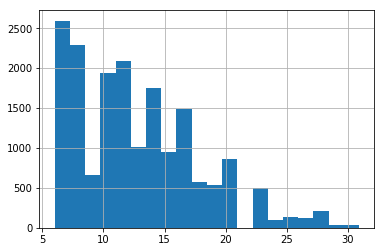

In [23]:
managers['int_rate'].hist(bins=20)

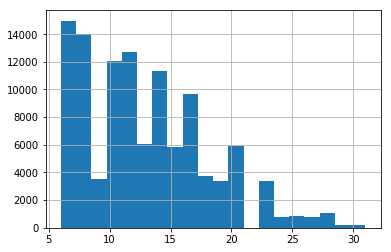

In [24]:
minions['int_rate'].hist(bins=20)

In [0]:
df['issue_d'] = pd.to_datetime(df['issue_d'], infer_datetime_format=True)
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], infer_datetime_format=True)
df['last_pymnt_d_month'] = df['last_pymnt_d'].dt.month
df['last_pyment_d_year'] = df['last_pymnt_d'].dt.year

In [26]:
df['issue_d'].head().values

array(['2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [27]:
df['last_pyment_d_year'].head()

0    2019.0
1    2019.0
2    2019.0
3    2019.0
4    2019.0
Name: last_pyment_d_year, dtype: float64

In [28]:
df['last_pymnt_d_month'].head()

0    7.0
1    7.0
2    6.0
3    7.0
4    7.0
Name: last_pymnt_d_month, dtype: float64

In [0]:
df['loan_status_is_great'] = df['loan_status'].str.contains('Current|Fully Paid').astype(int)

In [30]:
df.loan_status_is_great.head(20)

0     1
1     1
2     0
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
Name: loan_status_is_great, dtype: int64

In [31]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       ...
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term',
       'emp_title_manager', 'last_pymnt_d_month', 'last_pyment_d_year',
       'loan_status_is_great'],
      dtype='object', length=146)

In [0]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], infer_datetime_format=True)

In [0]:
df['earliest_cr_to_issue'] = df['issue_d'] - df['earliest_cr_line']

In [34]:
df['earliest_cr_to_issue'].head()

0   8370 days
1   4474 days
2   2801 days
3   7973 days
4   8735 days
Name: earliest_cr_to_issue, dtype: timedelta64[ns]

In [35]:
test = df.select_dtypes([np.object]).apply(lambda x: x.str.contains('%').any())
test

term                         False
grade                        False
sub_grade                    False
emp_title                     True
emp_length                   False
home_ownership               False
verification_status          False
loan_status                  False
pymnt_plan                   False
purpose                      False
title                        False
zip_code                     False
addr_state                   False
revol_util                    True
initial_list_status          False
next_pymnt_d                 False
last_credit_pull_d           False
application_type             False
verification_status_joint    False
sec_app_earliest_cr_line     False
hardship_flag                False
hardship_type                False
hardship_reason              False
hardship_status              False
hardship_start_date          False
hardship_end_date            False
payment_plan_start_date      False
hardship_loan_status         False
debt_settlement_flag

In [0]:
df['revol_util'] = [float(x.strip('%')) if x is str else 0 for x in df['revol_util']]

In [37]:
df['revol_util'].head()

0    0
1    0
2    0
3    0
4    0
Name: revol_util, dtype: int64

In [38]:

top20 = dict((df['emp_title'].value_counts(ascending=False).head(21)))
top20

{'Administrative Assistant': 409,
 'Director': 523,
 'Driver': 1258,
 'Engineer': 412,
 'General Manager': 791,
 'Manager': 2395,
 'Nurse': 425,
 'Office Manager': 805,
 'Operations Manager': 518,
 'Owner': 625,
 'Police Officer': 440,
 'Project Manager': 720,
 'Registered Nurse': 1418,
 'Rn': 834,
 'Sales': 803,
 'Sales Manager': 500,
 'Supervisor': 1160,
 'Teacher': 2557,
 'Technician': 420,
 'Truck Driver': 920,
 'Unknown': 20947}

In [0]:
#Get rid of multiple Nurse roles
df['emp_title'] = ['RN' if 'Nurse' in x else x for x in df['emp_title']]
df['emp_title'] = ['RN' if 'Rn' in x else x for x in df['emp_title']]

In [40]:
df['emp_title'].value_counts().head(20)

Unknown                     20947
RN                           3870
Teacher                      2557
Manager                      2395
Driver                       1258
Supervisor                   1160
Truck Driver                  920
Office Manager                805
Sales                         803
General Manager               791
Project Manager               720
Owner                         625
Director                      523
Operations Manager            518
Sales Manager                 500
Police Officer                440
Technician                    420
Engineer                      412
Administrative Assistant      409
Store Manager                 398
Name: emp_title, dtype: int64

In [0]:
top20 = dict((df['emp_title'].value_counts(ascending=False).head(21)))
df['emp_title'] = [x if x in top20 else 'Other'for x in df['emp_title']]


In [42]:
df['emp_title'].value_counts().head(20)

Other                       87550
Unknown                     20947
RN                           3870
Teacher                      2557
Manager                      2395
Driver                       1258
Supervisor                   1160
Truck Driver                  920
Office Manager                805
Sales                         803
General Manager               791
Project Manager               720
Owner                         625
Director                      523
Operations Manager            518
Sales Manager                 500
Police Officer                440
Technician                    420
Engineer                      412
Administrative Assistant      409
Name: emp_title, dtype: int64

In [43]:
df['term'].head()

0     36 months
1     36 months
2     36 months
3     60 months
4     36 months
Name: term, dtype: object

In [0]:
df['term'] = [int(x.strip('months')) for x in df['term']]


In [45]:
df['term'].head()

0    36
1    36
2    36
3    60
4    36
Name: term, dtype: int64

In [46]:
managers = df[df['emp_title_manager']==True]
minions = df[df['emp_title_manager']== False]
int_rate_bins = pd.cut(df['int_rate'], 20)
defaults_vs_int_rate = pd.crosstab(int_rate_bins, df['loan_status_is_great'], normalize='index')
defaults_vs_int_rate

loan_status_is_great,0,1
int_rate,,
"(5.975, 7.249]",0.013434,0.986566
"(7.249, 8.499]",0.017204,0.982796
"(8.499, 9.748]",0.017176,0.982824
"(9.748, 10.998]",0.029075,0.970925
"(10.998, 12.247]",0.034261,0.965739
"(12.247, 13.497]",0.042583,0.957417
"(13.497, 14.746]",0.048406,0.951594
"(14.746, 15.996]",0.058224,0.941776
"(15.996, 17.246]",0.068273,0.931727


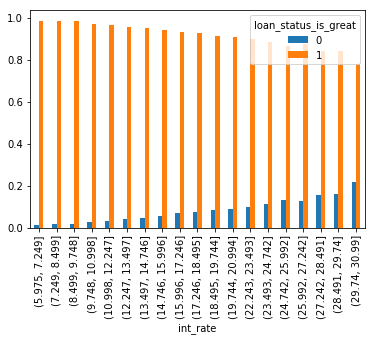

In [47]:
defaults_vs_int_rate.plot.bar()

In [0]:
# mino =  minions['loan_status_is_great']
# mana =  managers['loan_status_is_great']
# managers_vs_minions = pd.crosstab(int_rate_bins, [df['loan_status_is_great'], managers['loan_status_is_great']])
# print(managers_vs_minions)

In [0]:
managers.head()

In [0]:
minions.head()

In [0]:
df.head()

In [49]:
pd.crosstab(df['emp_title'], df['loan_status_is_great'], normalize='index')

loan_status_is_great,0,1
emp_title,,
Administrative Assistant,0.051345,0.948655
Director,0.051625,0.948375
Driver,0.065978,0.934022
Engineer,0.041262,0.958738
General Manager,0.053097,0.946903
Manager,0.056367,0.943633
Mechanic,0.048593,0.951407
Office Manager,0.043478,0.956522
Operations Manager,0.042471,0.957529


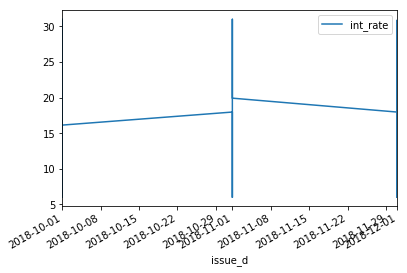

In [50]:
df.plot.line('issue_d','int_rate')

In [51]:
issue_bins = pd.cut(df['issue_d'].dt.month, 3)
print(issue_bins)

0          (11.333, 12.0]
1          (11.333, 12.0]
2          (11.333, 12.0]
3          (11.333, 12.0]
4          (11.333, 12.0]
               ...       
128407    (9.998, 10.667]
128408    (9.998, 10.667]
128409    (9.998, 10.667]
128410    (9.998, 10.667]
128411    (9.998, 10.667]
Name: issue_d, Length: 128412, dtype: category
Categories (3, interval[float64]): [(9.998, 10.667] < (10.667, 11.333] < (11.333, 12.0]]


In [52]:
!pip install pandas==0.25.1

In [0]:
date_vs_rate = pd.crosstab(issue_bins, int_rate_bins)

# STRETCH OPTIONS

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01